
# Project: Patient Appointment No-Show Analyis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this analysis, we will be exploring the No-show appointments data. The dataset containts data on 100k medical appointments made in Brazil. Fields contain information on the appointment scheduling, location, medical history, and some demograpich and location data. The tables and their descriptions are contained in the table below.

| Field Name | Description |
|---|---|
|PatientId|N/A|
|Gender|N/A|
|ScheduledDay|DateTime the appointment was made|
|AppointmentDay|DateTime of the appointment |
|Age|N/A|
|Neighbourhood|Patient location|
|Scholarship|Welfare participation|
|Hipertension|N/A|
|Diabetes|N/A|
|Alcoholism|N/A|
|Handcap|N/A|
|SMS_received|Patient reception of SMS reminder|
|No-show|Appontment No-show status|



### Question(s) for Analysis
#### 1) What qualities are likely contributing to a patient missing their appointment?

In [4]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas


    100% |████████████████████████████████| 9.5MB 3.6MB/s eta 0:00:01    46% |██████████████▊                 | 4.4MB 29.5MB/s eta 0:00:01    90% |█████████████████████████████   | 8.6MB 28.3MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 20.5MB/s ta 0:00:01
    99% |████████████████████████████████| 13.4MB 25.6MB/s eta 0:00:01   31% |██████████▎                     | 4.3MB 27.6MB/s eta 0:00:01    41% |█████████████▎                  | 5.6MB 26.4MB/s eta 0:00:01    60% |███████████████████▎            | 8.1MB 24.6MB/s eta 0:00:01    69% |██████████████████████▍         | 9.3MB 26.0MB/s eta 0:00:01    78% |█████████████████████████       | 10.5MB 25.7MB/s eta 0:00:01    100% |████████████████████████████████| 13.4MB 2.8MB/s 
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: python-dateutil 2.6.1
    Uninstalling python-dateutil-2.6.1:
      Successfully uninstalled python-dateutil-2.6.1
  Found exist

In [5]:
#Load dataset
df_no_show = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')


<a id='wrangling'></a>
## Data Wrangling
#### First look at the data



In [3]:
df_no_show.head() #Show sample data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_no_show.info() #look for null values and dataypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
sum(df_no_show.duplicated()) #sums the number of duplicated rows in the dataset

0

In [5]:
df_no_show.isnull().count() #counts missing values by field

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

In [6]:
df_no_show.isnull().sum().any() #returns True if fields have null values

False


### Data Cleaning
The data is pretty clean out of the box. There are no null values or duplicated rows of data found. The only issue are the ScheduledDay and AppointmentDay fields, which are currently set to string datatypes. These will need to be changed to datetime as we will want to look at of the number of days between the appoinment booking and appointment date are predictors of no-shows. 

That being said, we will need to add a column to the data that subtracts ScheduledDay from AppointmentDay to get the number of days. I AppointmentDay contains a time component whereas SchdeuledDay does not. This causes the new, calculated field to calculate negative days. I had to remove the time component to properly calculate the field. I also noticed that the PatientID colum is a float for some reason. We won't need this in the analysis, but an int datatype would be more fitting. I will also rename the "Neighbourhood" to the United States spelling, "Neighborhood". This way I don't have to remember the spelling every time I might reference the column.
 

In [30]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_no_show['ScheduledDay'] = pd.to_datetime(df_no_show['ScheduledDay'], format='%Y-%m-%d %H:%M:%S').dt.normalize()#converts string to datetime and strips the time from the output
df_no_show['AppointmentDay'] = pd.to_datetime(df_no_show['AppointmentDay']) #converts string to datetime
df_no_show['PatientId'] = df_no_show['PatientId'].astype(int)#converts to int
df_no_show['DaysAfterSched'] = (df_no_show['AppointmentDay'] - df_no_show['ScheduledDay']).dt.days
df_no_show.rename(columns={'Neighbourhood':'Neighborhood'}, inplace = True)#Rename Neighbourhood column to Neighborhood
df_no_show.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)#dropping un-needed columns
df_no_show.info() #confirm conversions


KeyError: 'PatientId'

In [31]:
df_no_show.head() #confirming changes

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysAfterSched
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: What attributes are the best predictors of appointment no shows

#### First I use the describe function to get some baseline stats on our data. 
- Average Age is 37, with the youngest being 1 and the oldest being 115! 
- About 10% receive medical welfare
- Hypertension is the most common medical ailment
- 32% recieve SMS appointment messages
- Average Days between scheduling and the appointment is 10


In [9]:
df_no_show.describe() #Basic stats for numeric fields

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysAfterSched
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


#### Let's run some basic histograms on the data as well. Looks like it tells the same story.

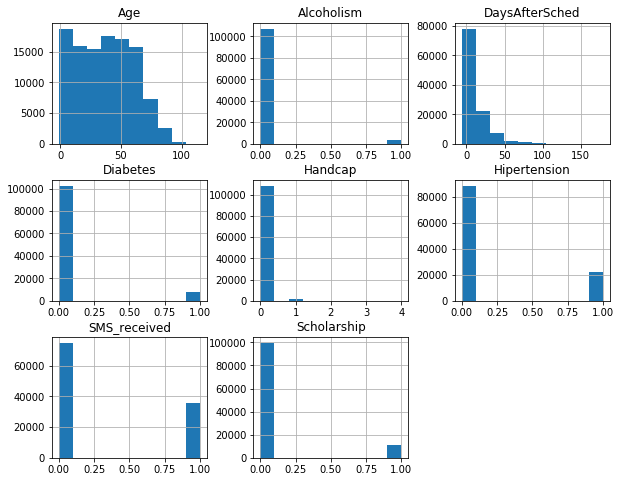

In [10]:
df_no_show.hist(figsize=(10, 8));

#### I want to see if there are any major differences between the no-show patients and the patients that do show up to their appointments. I calculated the averages of all relevant fields. 

- No shows tend to younger, but not signifigantly so
- No shows are more likely to be a part of the welfare system, but not signifigantly so
- Medical ailments do not seem to be particularly signifigant in predicting a no show rate
- No Shows recieved SMS messages more than patients that showed up
- Days between sheduling and the appointment looks like the biggest difference between the two groups!


In [11]:

df_no_show.groupby(['No-show']).mean() # Finds the average of all fields grouped by No-show type

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysAfterSched
No-show,,,,,,,,
No,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,8.754659
Yes,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,15.831489


## Gender
#### Gender does not play a signifigant role in whether a patient shows up to an appointment

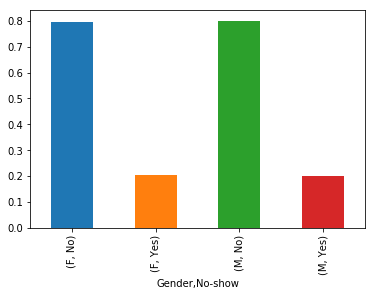

In [12]:
df_no_show.groupby(['Gender'])['No-show'].value_counts(normalize=True).plot(kind='bar'); # Finds the percentage of no-shows by gender and type

#### This is the same data, but it's easier to digest in a stacked bar chart. We can clearly see that there is no correlation between gender and wheather a patient is likely to miss their appointment.

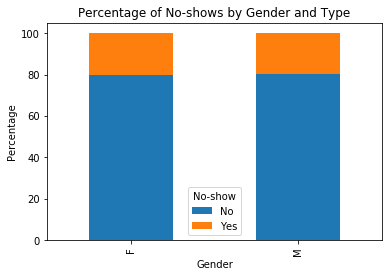

In [32]:
# Group the data by Gender and No-show, and compute the percentage of no-shows for each group
no_show_pct = df_no_show.groupby(['Gender'])['No-show'].value_counts(normalize=True) * 100

# Plot the data as a stacked bar chart
no_show_pct.unstack().plot(kind='bar', stacked=True);

# Add a title and axis labels
plt.title('Percentage of No-shows by Gender and Type');
plt.xlabel('Gender');
plt.ylabel('Percentage');



In [13]:
#converting plot into function that allows us to change variables grouped by No-show in a stacked bar chart
def plotCounts(df, xVar, normalize=True, mul=100):
    df.groupby([xVar])['No-show'].value_counts(normalize=normalize).unstack('No-show').mul(mul).plot.bar(stacked=True, rot=0);
    xVar=xVar.replace("_"," ") #replaces _ in variable name with space
    plt.title(f'Effect of {xVar} on Patient Attendance'.title(), weight='bold') #title and format
    plt.xlabel(xVar.title(), weight='bold') #x axis title and format
    plt.ylabel(f'{"Percentage" if normalize else "Frequency"}'.title(), weight="bold")#Updates y axis title depending on chart type
               

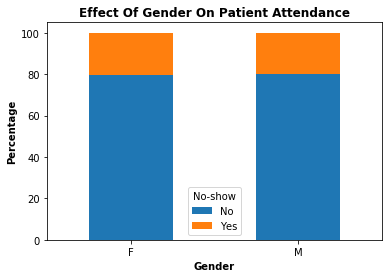

In [14]:
plotCounts(df_no_show, 'Gender')#calling plot by gender

## Age Distribution
#### We know that the no-shows tend to be younger, but we see a sharp decline among patients in their mid to late 50's for no-shows compared to the 60's for the patients who do show up to appointments. 

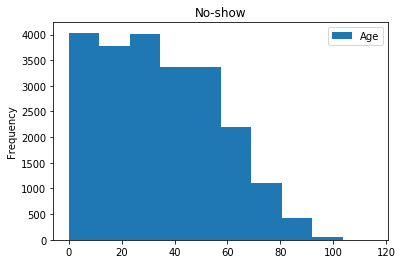

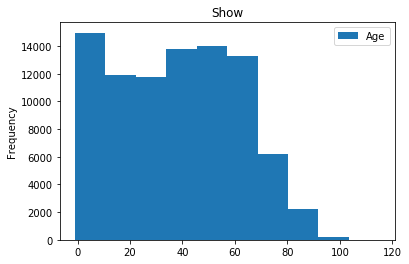

In [46]:
df_no_show2 = df_no_show.filter(items=['No-show','Age']);
df_no_show2[df_no_show2['No-show'] == "Yes"].plot(kind='hist', title = 'No-show'); #plots no shows by age
df_no_show2[df_no_show2['No-show'] == "No"].plot(kind='hist', title = 'Show'); #plots shows by age

Creating masks for easier sorting

In [14]:
Showed = df_no_show["No-show"] == "No" #creating a mask for patients who showed up
NoShow = df_no_show["No-show"] == "Yes" #creating a mask for patients who did not show up

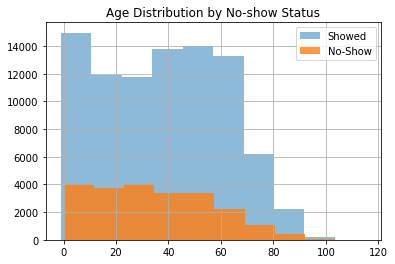

In [17]:
df_no_show.Age[Showed].hist(alpha=0.5, label='Showed');
df_no_show.Age[NoShow].hist(alpha=0.8 ,label='No-Show');
plt.title('Age Distribution by No-show Status')
plt.legend();

## Hipertension
#### In our earlier data exploration, we saw that patients with hipertension were more likely to show up to their appointments. We can see this in this chart, there aren't a lot of no-shows with hipertension (Yes, 1) compared to the other groupings. 

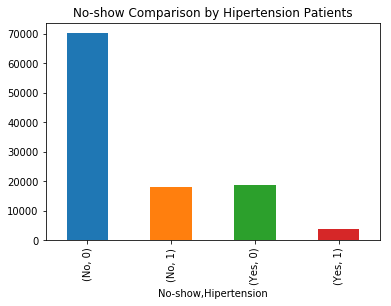

In [33]:
df_no_show.groupby('No-show').Hipertension.value_counts().plot(kind='bar');
plt.title('No-show Comparison by Hipertension Patients');


#### To better illustrate this, I took the same data and created a stacked bar chart

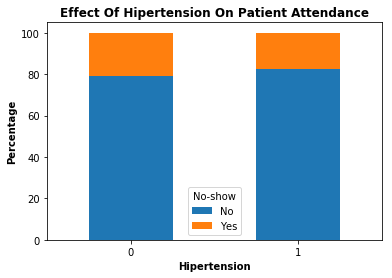

In [15]:
plotCounts(df_no_show, 'Hipertension')#calling plot function by gender

## Days from Sheduling Day to Appointment Day
#### Here we can that No-shows tend to schedule appointments almost a week before patients that do show up. The vertical lines represent the average. 

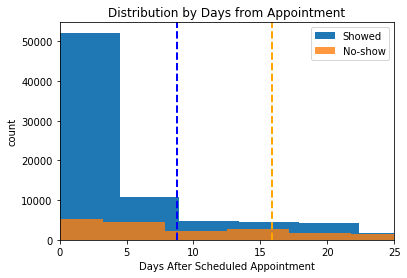

In [56]:
mean_showed = df_no_show.DaysAfterSched[Showed].mean() #creating new data table with the average Showed
mean_noshow = df_no_show.DaysAfterSched[NoShow].mean() #creating new data table with the average NoShow

plt.hist(df_no_show.DaysAfterSched[Showed], label='Showed', bins=40)#plot Showed
plt.hist(df_no_show.DaysAfterSched[NoShow], label='No-show', alpha=0.8, bins=40)#plot No-shows
plt.axvline(mean_showed, color='blue', linestyle='dashed', linewidth=2) #add average line
plt.axvline(mean_noshow, color='orange', linestyle='dashed', linewidth=2)#add average line
plt.title('Distribution by Days from Appointment')
plt.xlabel('Days After Scheduled Appointment')
plt.ylabel('Count')
plt.legend()
plt.xlim(0,25) #limit to 25 days for better clarity
plt.show()


## No-shows by Neighborhood


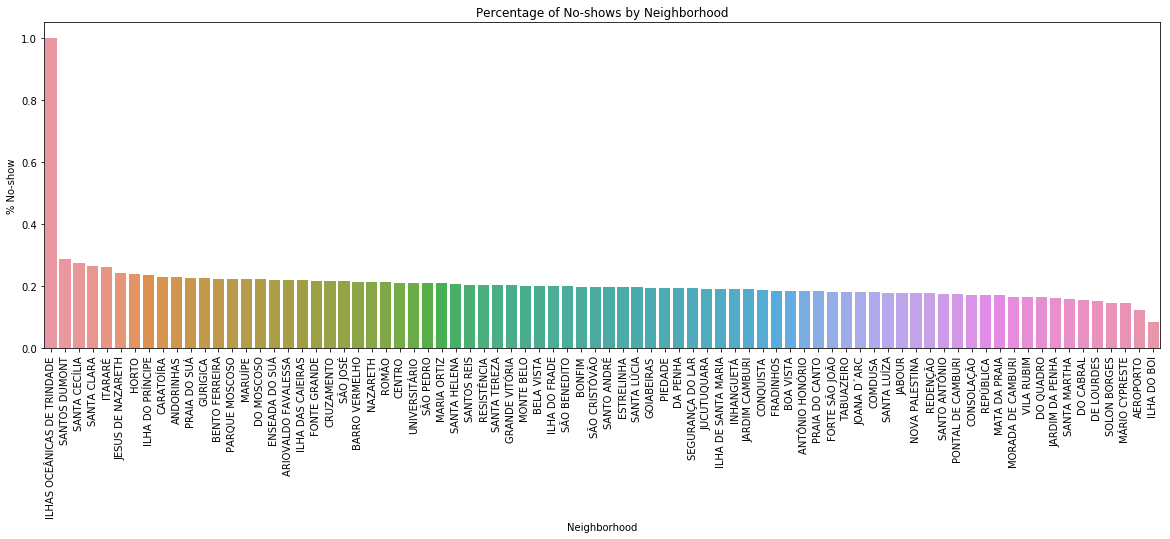

In [41]:
#plotting percentage of no-shows by neighborhood
df_no_show_loc = df_no_show.groupby('Neighborhood')['No-show'].value_counts(normalize=True).loc[:, 'Yes'].reset_index(name='% No-show').sort_values('% No-show', ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x='Neighborhood', y='% No-show', data=df_no_show_loc)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('% No-show')
plt.title('Percentage of No-shows by Neighborhood')
plt.show()


#### When plotting the percentage of no-shows by city, I noticed an outlier. We only have two patients in the entire neighborhood. They both booked their appointment on the same day and for the same day. This isn't enough data to be usuable and it's making the chart harder to read so I will remove them.

In [44]:
df_no_show[df_no_show['Neighborhood'] == 'ILHAS OCEÂNICAS DE TRINDADE']

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysAfterSched
48754,F,2016-04-14,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes,29
48765,F,2016-04-14,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes,29


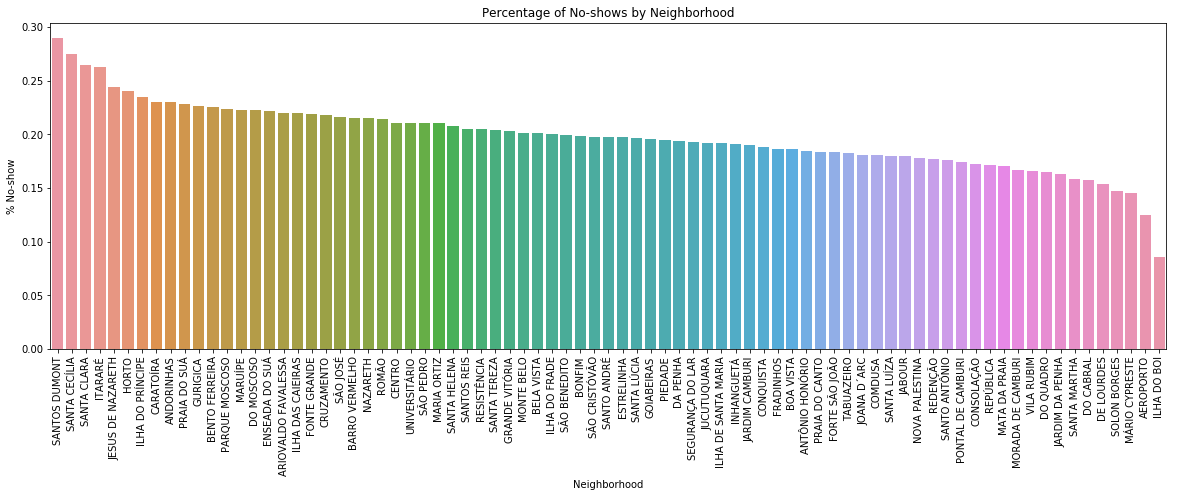

In [47]:
#creating new dataframe, without the outlier city then plotting percentage of no-shows by neighborhood
df_no_show_loc2 = df_no_show_loc[df_no_show_loc['Neighborhood'] != 'ILHAS OCEÂNICAS DE TRINDADE']

plt.figure(figsize=(20, 6))
sns.barplot(x='Neighborhood', y='% No-show', data=df_no_show_loc2)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('% No-show')
plt.title('Percentage of No-shows by Neighborhood')
plt.show()


<a id='conclusions'></a>
## Conclusions

There are two indicators that stood out in the analysis that correlated to whether a patient missed their appointment or not, hipertension and the number of days between scheduling and the appointment. The patient having hipertension is not very useful as preventing hipertension to begin with, would hopefully cut down on the amount of medical appointments needed to begin with. Days between scheduling and the actual appointment date seems to be the most important factor in determining if a patient attends their appointment. No-shows tended to book appointments around 15 days out, while patients that book less than 10 days out, tend to make their scheduled appointments. Putting limitations on how many days out a patient is allowed to book their appointment might be the key to reducing No-shows.

### Limitation
The biggest limitation with this dataset is the location data. We visualized the percentage of No-shows per nehigborhood, but it wasn't useful without more data about the locales. I would like to know how far the neghborhood is from the doctor. Maybe distance or transportation issues correlate to No-shows. Socioeconomic and demographic data would also further flesh out this analysis. Does household income, children in the home, job type have an affect on No-show rate? 



In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0